In [ ]:
# Import necessary libraries
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [131]:
# Load cancer dataset from sklearn
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [132]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [133]:
np.random.seed(42)  # For reproducibility
indices = np.random.choice(len(X), size=int(len(X) * 0.1), replace=False)
X = X[indices]
y = y[indices]

In [134]:
# Create a DataFrame for better visualization
feature_names = cancer.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = [cancer.target_names[i] for i in y]

# Display the first 5 rows of the dataset
print("First 5 rows of the cancer dataset:")
display(df.head())


First 5 rows of the cancer dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1,benign
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0,malignant
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0,malignant
3,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1,benign
4,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1,benign


In [135]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count    56.000000     56.000000       56.000000    56.000000   
mean     13.785732     19.291607       89.620179   619.353571   
std       3.349860      4.361218       23.293864   312.383113   
min       6.981000     10.940000       43.790000   143.500000   
25%      11.607500     15.842500       74.547500   414.400000   
50%      13.140000     19.030000       84.190000   524.700000   
75%      15.600000     22.122500      101.950000   761.125000   
max      22.010000     29.330000      147.200000  1482.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count        56.000000         56.000000       56.000000            56.000000   
mean          0.098979          0.101619        0.078335             0.047932   
std           0.014657          0.047746        0.075301             0.040633   
min           0.068280          0.039120        0.000000             0.000000   
25%      

In [136]:
# Feature selection using SelectKBest
# We'll select the most important features based on ANOVA F-value
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_indices]

print(f"Top 5 selected features: {selected_feature_names}")
print("Feature scores:")
for i, name in enumerate(feature_names):
    print(f"{name}: {selector.scores_[i]:.2f}")

Top 5 selected features: ['mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area']
Feature scores:
mean radius: 116.84
mean texture: 10.94
mean perimeter: 119.78
mean area: 129.47
mean smoothness: 2.44
mean compactness: 30.32
mean concavity: 61.84
mean concave points: 79.72
mean symmetry: 0.27
mean fractal dimension: 0.52
radius error: 48.04
texture error: 0.42
perimeter error: 47.94
area error: 103.85
smoothness error: 4.66
compactness error: 7.42
concavity error: 8.51
concave points error: 5.28
symmetry error: 1.17
fractal dimension error: 2.37
worst radius: 165.08
worst texture: 11.64
worst perimeter: 155.13
worst area: 166.70
worst smoothness: 3.97
worst compactness: 21.03
worst concavity: 42.72
worst concave points: 97.80
worst symmetry: 2.71
worst fractal dimension: 8.44


In [137]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Before scaling (first 3 samples):")
display(pd.DataFrame(X[:3], columns=feature_names))

print("After scaling (first 3 samples):")
display(pd.DataFrame(X_scaled[:3], columns=feature_names))

Before scaling (first 3 samples):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.08750
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


After scaling (first 3 samples):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.396327,-0.160016,-0.369513,-0.443998,0.046211,0.088350,0.022984,-0.241435,0.339373,0.135933,...,-0.178619,-0.066671,-0.232222,-0.288368,0.463500,0.026318,0.194917,-0.055408,0.366234,0.391413
1,1.552576,0.466993,1.471947,1.649474,-0.611933,0.027062,0.397520,0.784171,-1.077732,-1.383848,...,1.969618,0.266808,1.910941,2.094618,-0.746897,-0.001609,0.203434,1.222594,-0.638072,-1.099343
2,0.504325,0.043588,0.523277,0.418457,0.703667,0.437053,0.914768,0.817944,0.364162,-0.825595,...,0.753225,0.167108,0.652964,0.670563,1.086881,0.036956,0.791141,0.768524,-0.017702,-0.112864


In [138]:
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(
    data=X_pca, 
    columns=['Principal Component 1', 'Principal Component 2']
)
pca_df['target'] = y
pca_df['target_name'] = [cancer.target_names[i] for i in y]

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2f}")

# Get the first two samples for quantum circuit demonstration
x1 = np.array(X_pca[0])
x2 = np.array(X_pca[1])

Explained variance ratio: [0.4776986  0.17822619]
Total explained variance: 0.66


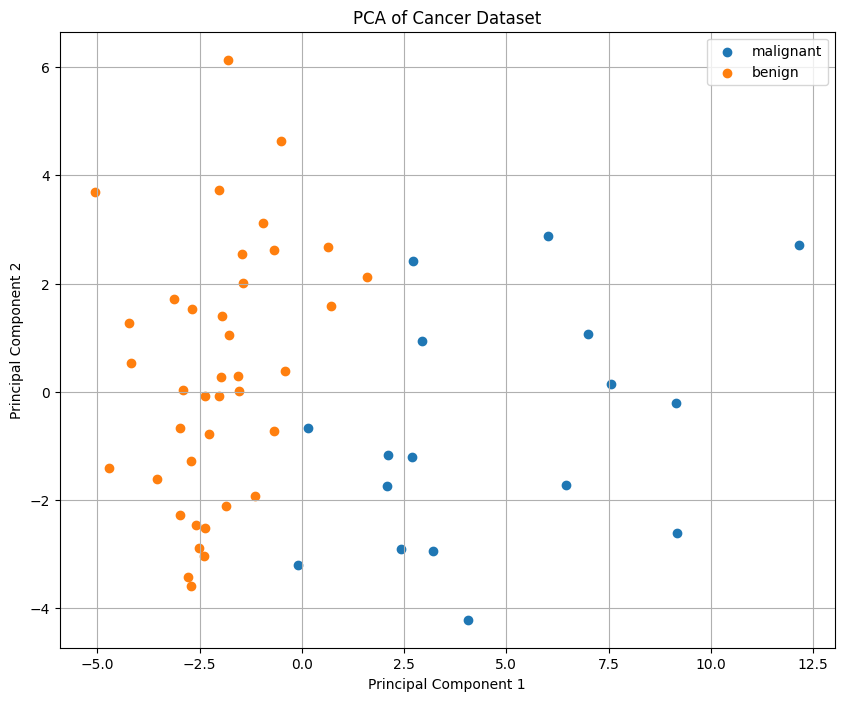

In [139]:
# Visualize PCA results
plt.figure(figsize=(10, 8))
for target in np.unique(y):
    indices = pca_df['target'] == target
    plt.scatter(
        pca_df.loc[indices, 'Principal Component 1'],
        pca_df.loc[indices, 'Principal Component 2'],
        label=cancer.target_names[target]
    )
plt.title('PCA of Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)

In [141]:
n_qubits = 2  # Matching our PCA dimensions
dev = qml.device("default.qubit", wires=n_qubits)

def feature_map(x):
    # Apply Hadamard gates to create superposition
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.RZ(x[i], wires=i)
    
    # Add entanglement
    qml.CNOT(wires=[0, 1])
    qml.RZ(x[0] * x[1], wires=1)  # Non-linear transformation
    qml.CNOT(wires=[0, 1])

@qml.qnode(dev)
def kernel_circuit(x1, x2):
    feature_map(x1)
    qml.adjoint(feature_map)(x2)
    return qml.probs(wires=range(n_qubits))

Quantum circuit for first 2 PCA-reduced samples:
0: ──H──RZ(-0.40)─╭●────────────╭●─╭●───────────────╭●───RZ(4.05)†───H†─┤ ╭Probs
1: ──H──RZ(0.38)──╰X──RZ(-0.16)─╰X─╰X†──RZ(-17.10)†─╰X†──RZ(-4.22)†──H†─┤ ╰Probs


C:\Users\Aravind\AppData\Local\Temp\ipykernel_7220\783357914.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


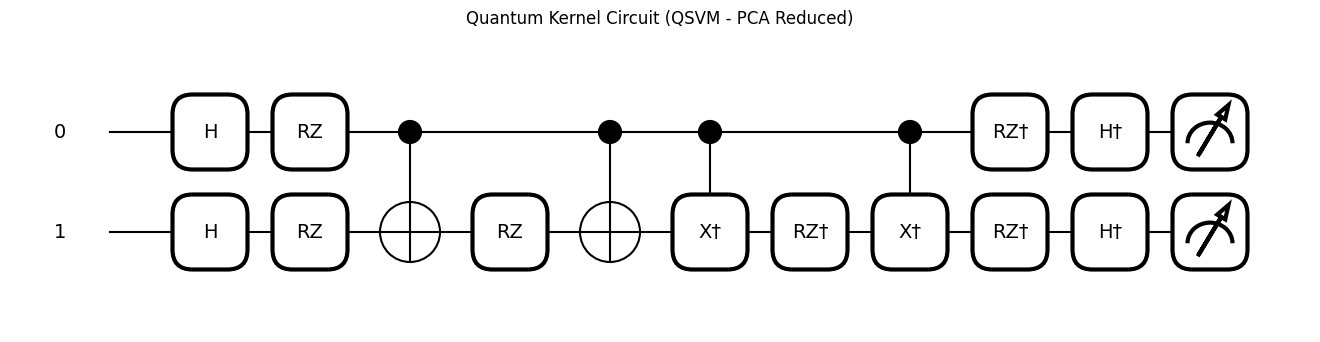

In [142]:
# Draw and visualize the circuit
drawer = qml.draw(kernel_circuit)
print("Quantum circuit for first 2 PCA-reduced samples:")
print(drawer(x1, x2))

qml.drawer.use_style("black_white")
fig = qml.draw_mpl(kernel_circuit)(x1, x2)
plt.title("Quantum Kernel Circuit (QSVM - PCA Reduced)")
plt.tight_layout()
plt.show()

In [143]:
# Define quantum kernel function
def quantum_kernel(X1, X2):
    kernel = np.zeros((len(X1), len(X2)))
    for i in range(len(X1)):
        for j in range(len(X2)):
            probs = kernel_circuit(X1[i], X2[j])
            kernel[i, j] = probs[0]  # We use the probability of measuring |00⟩
    return kernel

# Compute kernel matrices
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

print("Computing training kernel matrix...")
kernel_train = quantum_kernel(X_train_np, X_train_np)
print("Computing test kernel matrix...")
kernel_test = quantum_kernel(X_test_np, X_train_np)


Computing training kernel matrix...
Computing test kernel matrix...


In [144]:
# Train SVM and evaluate

from sklearn.metrics import accuracy_score
svm = SVC(kernel='precomputed')
svm.fit(kernel_train, y_train)
y_pred = svm.predict(kernel_test)

print(accuracy_score(y_test, y_pred))

0.6956521739130435
